# Data representation with MPPData
MPPData is the main data representation for the data used in this project.
It is represented on disk by a folder containing npy and csv files. Assuming N observations/pixels and C protein channels, the data is saved in:
- mpp.npy: NxC, per-pixel values
- x.npy, y.npy: Nx1, spatial coordinates of each pixel
- obj_ids.npy: Nx1, object id (cell) that each pixel belongs to
- channels.csv: C, protein channel names
- metadata.csv: #objects, metadata information (perturbation, cell cycle, etc) for each object (cell)

During processing of the data, additional npy files might be created. For example, after training a cVAE and clustering its latent space into ICLs, the results directory will also contain:
- conditions.npy: Nx#conditions, conditions used to train the cVAE
- latent.npy: Nx#latent, latent space of the cVAE used for clustering of ICLs
- clustering.npy: Nx#clusters, clustering of latent.npy
- cluster_annotation.csv: #clusters, mapping of clusters to cluster names

TODO add comments and a bit more info in the following

In [1]:
import importlib
import sys
sys.path.append('..')

import miann.data._data
from miann.data._data import MPPData
importlib.reload(miann.data._data)

from miann.utils import init_logging
import os
import numpy as np
import logging

logging.basicConfig(level=logging.INFO)
#init_logging()

### Load data into MPPData class

First, set up the config.ini file in the main directory:

1. Field [DEFAULT]

**experiment_dir** is the path to the directory where experiment results
were stored

**data_dir** is the path to directory were all data is stored.
This folder could contain separate folders for different perturbations,
 within which folders corresponding to the separate wells are stored.

2. Field [data]

Each constant there contains a path to a python file, where parameters that are specific to the required data load are stored. Please refer to e.g. "notebooks/params/NascentRNA_constants_1" to see an example.
___

To construct the MPPData entity, the following params are then provided:

1. **data_dir**: Path to the specific directory containing one set of npy
and csv files as described above. Note that this path should be
relative to the 'base_dir',which is set to **data_dir** path (from config.ini)
if not provided.
2. **data_config**: Name of the constant in the [data] field of
config.ini file, which contains path to the python file with configuration
parameters for loading the data.



In [8]:
mpp_data = miann.data._data.MPPData.from_data_dir(data_dir='184A1_unperturbed/I09', data_config='NascentRNA_test')
print(mpp_data)

INFO:MPPData:Created new: MPPData for NascentRNA_test (12132995 mpps with shape (1, 1, 35) from 886 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels'].
INFO:MPPData:Loaded data from 184A1_unperturbed/I09.


MPPData for NascentRNA_test (12132995 mpps with shape (1, 1, 35) from 886 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels'].


### Subset data

There, several options for subsetting the data exist.

First, data could be subset by channel names.

In [9]:
#subset channels
channels = [
        '01_CDK9_pT186', '01_PABPC1', '02_CDK7', '03_CDK9', '03_RPS6', '05_GTF2B', '05_Sm', '07_POLR2A', '07_SETD1A',
        '08_H3K4me3', '09_CCNT1', '09_SRRM2', '10_H3K27ac', '10_POL2RA_pS2', '11_KPNA2_MAX', '11_PML', '12_RB1_pS807_S811',
        '12_YAP1', '13_PABPN1', '13_POL2RA_pS5', '14_PCNA', '15_SON', '15_U2SNRNPB', '16_H3', '17_HDAC3', '17_SRSF2',
        '18_NONO', '19_KPNA1_MAX', '20_ALYREF', '20_SP100', '21_COIL', '21_NCL', '00_DAPI', '07_H2B'
        ]
mpp_channels=mpp_data.channels
# print(mpp_channels)
mpp_data.subset_channels(channels)
subset_mpp_channels=mpp_data.channels
# print(subset_mpp_channels)

print("The following channels were excluded:", np.setdiff1d(mpp_channels, subset_mpp_channels))

INFO:MPPData:Restricted channels to 34 channels


The following channels were excluded: ['00_EU']


In [2]:
# filter by NO_NAN cellcycle stage
mpp_data.subset(cell_cycle='NO_NAN')
print(np.unique(mpp_data.metadata.cell_cycle))

INFO:MPPData:Created new: MPPData for NascentRNA (12132995 mpps with shape (1, 1, 35) from 886 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels'].


MPPData for NascentRNA (12132995 mpps with shape (1, 1, 35) from 886 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels'].


In [3]:
# subset channels
channels = [
        '01_CDK9_pT186', '01_PABPC1', '02_CDK7', '03_CDK9', '03_RPS6', '05_GTF2B', '05_Sm', '07_POLR2A', '07_SETD1A', 
        '08_H3K4me3', '09_CCNT1', '09_SRRM2', '10_H3K27ac', '10_POL2RA_pS2', '11_KPNA2_MAX', '11_PML', '12_RB1_pS807_S811', 
        '12_YAP1', '13_PABPN1', '13_POL2RA_pS5', '14_PCNA', '15_SON', '15_U2SNRNPB', '16_H3', '17_HDAC3', '17_SRSF2', 
        '18_NONO', '19_KPNA1_MAX', '20_ALYREF', '20_SP100', '21_COIL', '21_NCL', '00_DAPI', '07_H2B'
        ]
print(mpp_data.channels)
mpp_data.subset_channels(channels)
print(mpp_data.channels)

                         name
channel_id                   
0                       00_EU
1               01_CDK9_pT186
2                   01_PABPC1
3                     02_CDK7
4                     03_CDK9
5                     03_RPS6
6                    05_GTF2B
7                       05_Sm
8                   07_POLR2A
9                   07_SETD1A
10                 08_H3K4me3
11                   09_CCNT1
12                   09_SRRM2
13                 10_H3K27ac
14              10_POL2RA_pS2
15               11_KPNA2_MAX
16                     11_PML
17          12_RB1_pS807_S811
18                    12_YAP1
19                  13_PABPN1
20              13_POL2RA_pS5
21                    14_PCNA
22                     15_SON
23                15_U2SNRNPB
24                      16_H3
25                   17_HDAC3
26                   17_SRSF2
27                    18_NONO
28               19_KPNA1_MAX
29                  20_ALYREF
30                   20_SP100
31        

INFO:MPPData:Restricted channels to 34 channels


                         name
channel_id                   
0               01_CDK9_pT186
1                   01_PABPC1
2                     02_CDK7
3                     03_CDK9
4                     03_RPS6
5                    05_GTF2B
6                       05_Sm
7                   07_POLR2A
8                   07_SETD1A
9                  08_H3K4me3
10                   09_CCNT1
11                   09_SRRM2
12                 10_H3K27ac
13              10_POL2RA_pS2
14               11_KPNA2_MAX
15                     11_PML
16          12_RB1_pS807_S811
17                    12_YAP1
18                  13_PABPN1
19              13_POL2RA_pS5
20                    14_PCNA
21                     15_SON
22                15_U2SNRNPB
23                      16_H3
24                   17_HDAC3
25                   17_SRSF2
26                    18_NONO
27               19_KPNA1_MAX
28                  20_ALYREF
29                   20_SP100
30                    21_COIL
31        

In [4]:
# filter by NO_NAN cellcycle stage
mpp_data.subset(cell_cycle='NO_NAN')
print(np.unique(mpp_data.metadata.cell_cycle))

INFO:MPPData:Before subsetting: 886 objects
INFO:MPPData:Subsetting to NO_NAN cell_cycle: 557 objects


['G1' 'G2' 'S']


In [9]:
# get condition for each mpp
TR = mpp_data.get_condition('TR')[:,0]
print(TR)

INFO:MPPData:Looking up condition TR, with postprocess None
INFO:convert_condition:Not converting condition TR (is regression)


[321.75566355 321.75566355 321.75566355 ... 394.72097823 394.72097823
 394.72097823]


In [5]:
# add conditions
cond_params = {}
mpp_data.add_conditions(['TR_norm_lowhigh_bin_2', 'TR_bin_3', 'cell_cycle'], cond_params=cond_params)

print(mpp_data.conditions)
print(cond_params)

INFO:MPPData:Adding conditions: ['TR_norm_lowhigh_bin_2', 'TR_bin_3', 'cell_cycle']
INFO:MPPData:Looking up condition TR_norm, with postprocess lowhigh_bin_2
INFO:MPPData:Looking up condition TR, with postprocess bin_3
INFO:MPPData:Looking up condition cell_cycle, with postprocess None
INFO:convert_condition:Converting condition cell_cycle to numbers


[[ 0.  1.  0.  0.  1.  2.]
 [ 0.  1.  0.  0.  1.  2.]
 [ 0.  1.  0.  0.  1.  2.]
 ...
 [nan nan  0.  1.  0.  1.]
 [nan nan  0.  1.  0.  1.]
 [nan nan  0.  1.  0.  1.]]
{'TR_norm_lowhigh_bin_2_quantile': [338.1978527745389, 418.8766845744007], 'TR_bin_3_quantile': [362.1374296178866, 411.146330758427]}


In [6]:
# filter nan objects with nan conditions
mpp_data.subset(nona_condition=True)

INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to objects with NO_NAN condition: 283


In [7]:
# normalise
rescale_values = []
mpp_data.normalise(background_value='mean_background', percentile= 98.0, rescale_values=rescale_values)
print(rescale_values)

INFO:MPPData:Subtracting channel-specific background value defined in column mean_background
INFO:MPPData:Rescaling MPP intensities per channel with 98.0 percentile


[53.889077674895006, 61.29248486934, 288.580564999614, 94.797795010537, 46.969012700825004, 196.166104554605, 102.192703487811, 334.88636174276803, 95.989850032596, 111.921074631886, 216.454320872445, 276.374678140131, 198.10488029550498, 569.873113168236, 124.093431062583, 76.143769097638, 194.20852422806, 211.926705230017, 420.026212072665, 479.722105769381, 156.451838886362, 227.390029544676, 84.901763855899, 458.498049074523, 150.04311273660198, 175.21535973943702, 629.34514056733, 139.20844135918, 709.734122587939, 229.365936479147, 26.306330100778, 199.97347517141299, 70.3, 322.3]


In [8]:
# subsample
mpp_data_sub = mpp_data.subsample(frac_per_obj=0.05, 
add_neighborhood=True, neighborhood_size=3)

print(mpp_data.mpp.shape, mpp_data_sub.mpp.shape)

INFO:MPPData:Subsampling each object to 5.0%
INFO:MPPData:Created new: MPPData for NascentRNA (181018 mpps with shape (1, 1, 34) from 283 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels', 'conditions'].
INFO:MPPData:Adding neighborhood of size 3


(3623046, 1, 1, 34) (181018, 3, 3, 34)


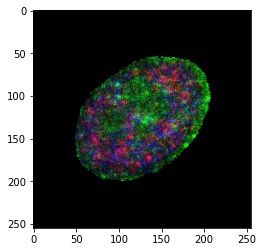

In [9]:
# get and plot image
import matplotlib.pyplot as plt

img = mpp_data.get_object_img(mpp_data.unique_obj_ids[0], 
channel_ids=[0,1,10], img_size=255)

plt.imshow(img)

In [12]:
# add neighbors
mpp_data.add_neighborhood(size=3)
print(mpp_data.mpp.shape)

INFO:MPPData:Adding neighborhood of size 3


INFO:MPPData:Before subsetting: 886 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (10057 mpps with shape (1, 1, 35) from 1 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels'].
/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'plate_name' as categorical
/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/annd

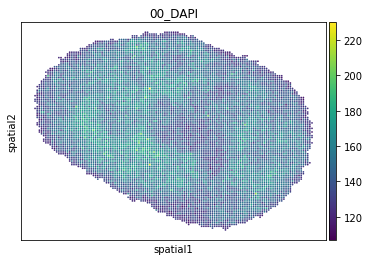

In [3]:
# subset to one cell
mpp_data_sub = mpp_data.subset(obj_ids=mpp_data.unique_obj_ids[:1], copy=True)

# get adata object from information in MPPData
adata = mpp_data_sub.get_adata()
adata

# with adata, can use all scanpy functions, e.g. spatial plotting
import scanpy as sc
sc.pl.embedding(adata, basis='spatial', color=['00_DAPI'])